Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [1]:
!pip install pymystem3

In [2]:
import re

In [3]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [7]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [8]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [9]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [10]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [11]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [12]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [13]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [14]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [15]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [16]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [17]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [21]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [20]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [19]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [18]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [22]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('сплав стали')

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

In [ ]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


=== АНАЛИЗ РУССКОГО ТЕКСТА ===

Топ-30 ключевых слов (RU: Только токены):
[('кино', 4), ('лучших', 3), ('место', 3), ('истории', 2), ('рейтинг', 2), ('числа', 2), ('худею', 2), ('особо', 2), ('серебряные', 2), ('коньки', 2), ('российских', 1), ('фильмов', 1), ('скажи', 1), ('марк', 1), ('романов', 1), ('это', 1), ('должно', 1), ('балабанова', 1), ('быкова', 1), ('звягинцева', 1), ('утомленных', 1), ('солнцем', 1), ('ширли', 1), ('мырли', 1), ('спросите', 1), ('долистав', 1), ('конца', 1), ('списка', 1), ('будете', 1), ('правы', 1)]


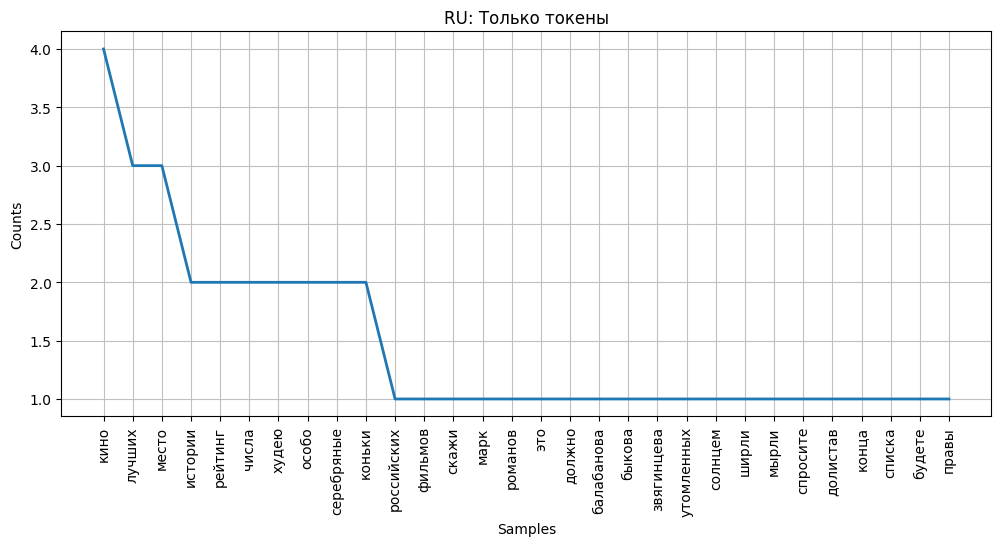


Топ-30 ключевых слов (RU: Лемма + POS):
[('российский_A', 4), ('кино_S', 4), ('хороший_A', 3), ('фильм_S', 3), ('который_APRO', 3), ('е_S', 3), ('место_S', 3), ('худеть_V', 3), ('конек_S', 3), ('история_S', 2), ('рейтинг_S', 2), ('давать_V', 2), ('каждый_APRO', 2), ('сердце_S', 2), ('мочь_V', 2), ('число_S', 2), ('выходить_V', 2), ('любовь_S', 2), ('человек_S', 2), ('сделать_V', 2), ('настоящий_A', 2), ('друг_S', 2), ('особо_ADV', 2), ('серебряный_A', 2), ('сказать_V', 1), ('марк_S', 1), ('роман_S', 1), ('это_SPRO', 1), ('должно_ADV', 1), ('балабанов_S', 1)]


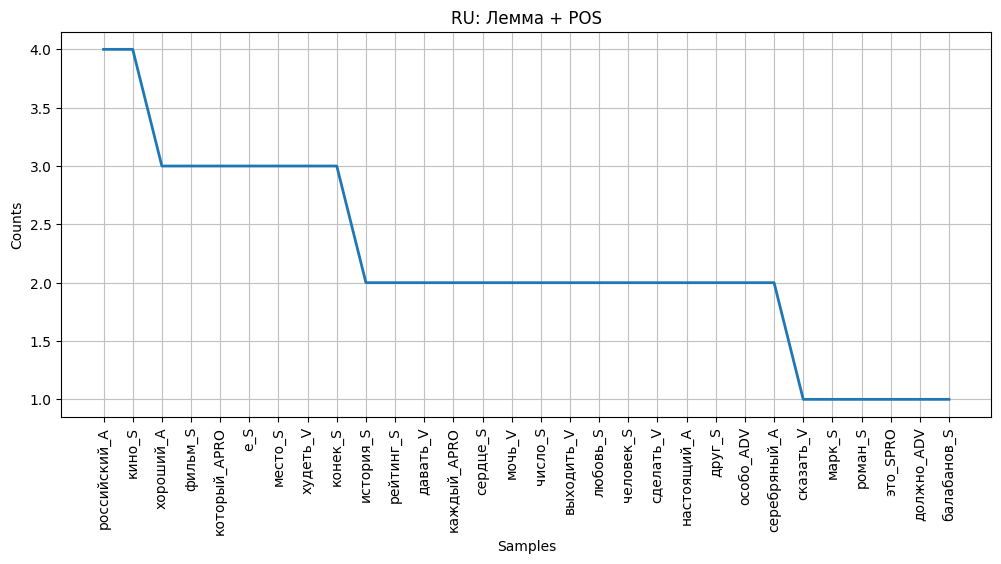


Топ-30 ключевых слов (RU: Леммы):
[('российский', 4), ('кино', 4), ('хороший', 3), ('фильм', 3), ('который', 3), ('е', 3), ('место', 3), ('худеть', 3), ('конек', 3), ('история', 2), ('рейтинг', 2), ('давать', 2), ('каждый', 2), ('сердце', 2), ('мочь', 2), ('число', 2), ('выходить', 2), ('любовь', 2), ('человек', 2), ('сделать', 2), ('настоящий', 2), ('друг', 2), ('особо', 2), ('серебряный', 2), ('сказать', 1), ('марк', 1), ('роман', 1), ('это', 1), ('должно', 1), ('балабанов', 1)]


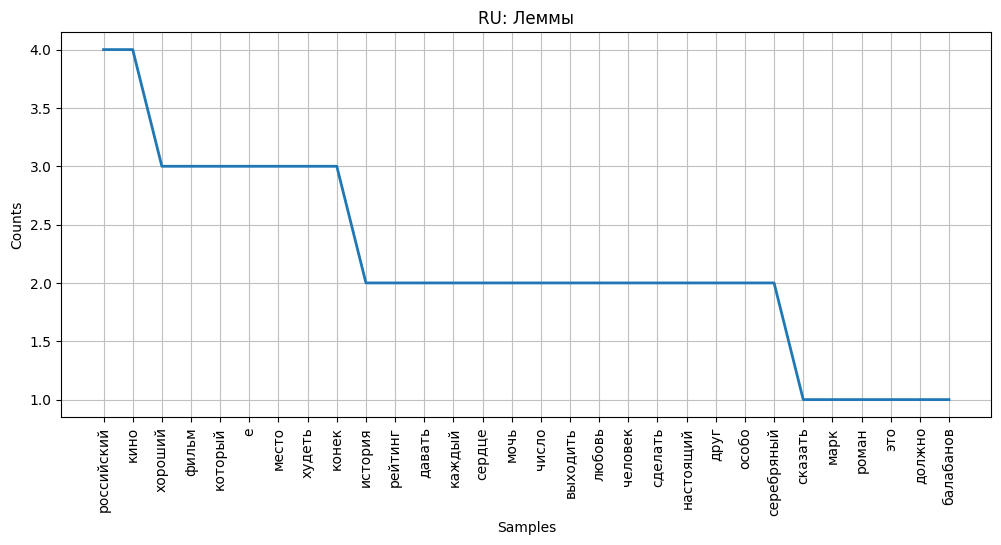


=== АНАЛИЗ АНГЛИЙСКОГО ТЕКСТА ===

Топ-30 ключевых слов (EN: Только токены):
[('superbad', 3), ('man', 3), ('herzog', 3), ('treadwell', 3), ('century', 2), ('greg', 2), ('mottola', 2), ('every', 2), ('seth', 2), ('evan', 2), ('hill', 2), ('cera', 2), ('director', 2), ('opening', 2), ('bong', 2), ('joon', 2), ('men', 2), ('dressed', 2), ('moments', 2), ('film', 2), ('grizzly', 2), ('werner', 2), ('camera', 2), ('behind', 2), ('would', 2), ('best', 1), ('movies', 1), ('generation', 1), ('gets', 1), ('defining', 1)]


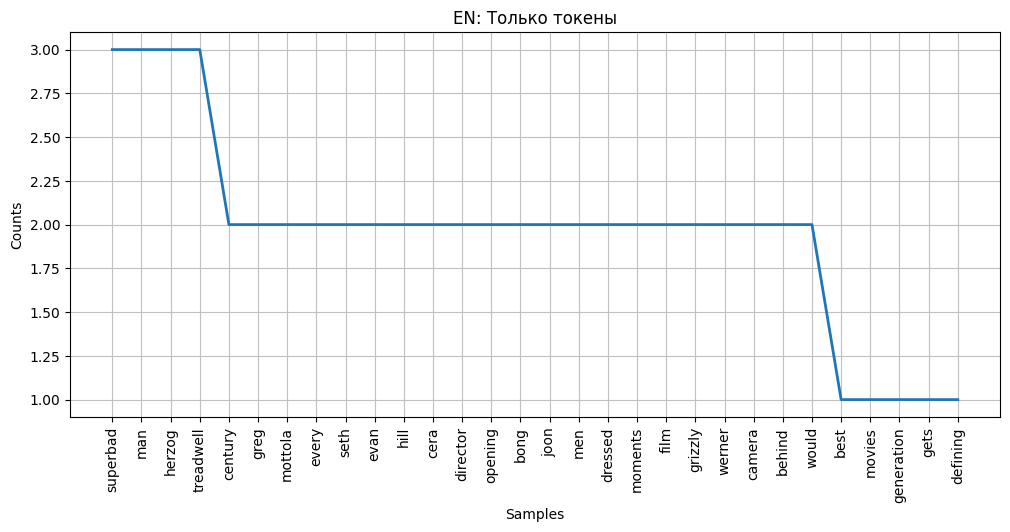


Топ-30 ключевых слов (EN: Токен + POS):
[('superbad_NOUN', 3), ('man_NOUN', 3), ('century_NOUN', 2), ('greg_NOUN', 2), ('mottola_NOUN', 2), ('every_DET', 2), ('director_NOUN', 2), ('men_NOUN', 2), ('dressed_VERB', 2), ('moments_NOUN', 2), ('film_NOUN', 2), ('grizzly_NOUN', 2), ('werner_NOUN', 2), ('camera_NOUN', 2), ('would_VERB', 2), ('herzog_NOUN', 2), ('treadwell_NOUN', 2), ('best_ADJ', 1), ('movies_NOUN', 1), ('generation_NOUN', 1), ('gets_VERB', 1), ('defining_VERB', 1), ('teen_ADJ', 1), ('comedy_ADJ', 1), ('script_NOUN', 1), ('seth_VERB', 1), ('rogen_NOUN', 1), ('evan_NOUN', 1), ('goldberg_NOUN', 1), ('pals_NOUN', 1)]


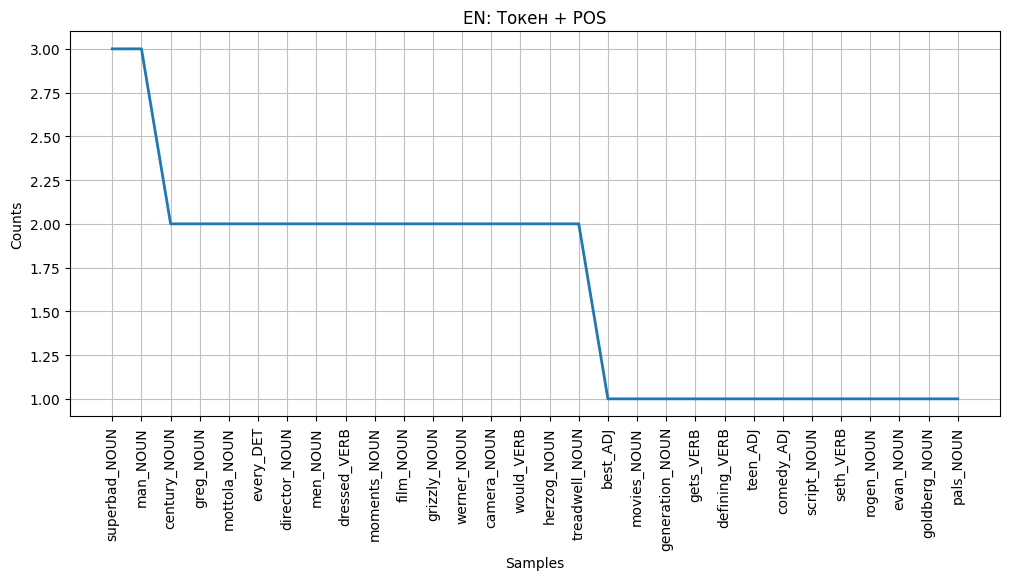


Топ-30 ключевых слов (EN: Леммы):
[('superbad', 3), ('man', 3), ('herzog', 3), ('treadwell', 3), ('movie', 2), ('century', 2), ('greg', 2), ('mottola', 2), ('every', 2), ('get', 2), ('seth', 2), ('evan', 2), ('hill', 2), ('cera', 2), ('director', 2), ('opening', 2), ('bong', 2), ('joon', 2), ('men', 2), ('dressed', 2), ('moment', 2), ('time', 2), ('film', 2), ('grizzly', 2), ('werner', 2), ('camera', 2), ('bear', 2), ('behind', 2), ('would', 2), ('best', 1)]


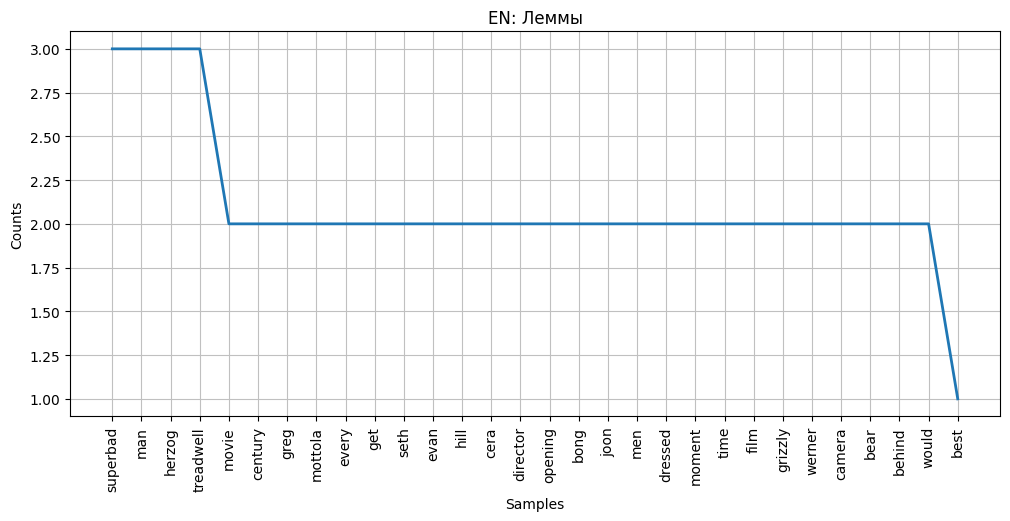

In [25]:
english_text = "THE 100 BEST MOVIES OF THE 21st CENTURY 100 Superbad Greg Mottola, 2007 Every generation gets its defining teen comedy. For the 21st century, that’s “Superbad.” The script by Seth Rogen and Evan Goldberg — about pals named Seth (Jonah Hill) and Evan (Michael Cera) trying to get laid before they graduate high school — is both hilariously profane and surreptitiously sweet. The director Greg Mottola took the antics and elevated them with retro opening titles and an uproarious sequence involving phallic cartoons. But “Superbad” is also a feat of casting, introducing moviegoers to the talents of Hill, Cera and Emma Stone. 99 Memories of Murder Bong Joon Ho, 2005 A close up image of two men dressed in green looking over a bush with intense expressions. The first clue that this Korean police procedural isn’t bound by Hollywood genre conventions comes in the opening moments: A detective (played by Song Kang Ho) summoned to investigate a dead body in a rural outpost arrives by hitching a ride on a plodding tractor. The grim laughs continue when other hapless investigators fall quite literally into the crime scene. The director Bong Joon Ho has strong ideas about the limits of men facing unfathomable evil, and he explores them with his hallmark mix of unexpected humor and sharply observed drama. “I’ve seen that movie at least 20 times and it hits me differently every single time. I remember being frightened, laughing, crying and holding my breath. And it may have the greatest ending, in my opinion, of any film.” 98 Grizzly Man Werner Herzog, 2005 A man dressed in black with sunglasses on gazes into the camera while a grizzly bear stands on a grassy field behind him. It would be easy to assume that this Werner Herzog documentary about Timothy Treadwell, who spent many summers cohabitating with Alaska’s brown bears, would skew educational. But Treadwell wasn’t an expert in the traditional sense, and this film is more about a man grappling with his place in the world. Treadwell left behind hours of self-recorded videos, and his camera’s microphone was on when he and his girlfriend were mauled to death in 2003. We watch Herzog listen to those moments, making it the most haunting audio you’ll never hear."

russian_text = "20 лучших российских фильмов в истории «Вот скажи мне, Марк Романов, что это за рейтинг? Разве тут не должно быть Балабанова, Быкова, еще больше Звягинцева, «Утомленных солнцем», «Ширли-мырли»?» — спросите вы, долистав до конца списка. И будете правы — данный топ являет собой абсолютную вкусовщину. Но кино на то и существует, чтобы каждая его частичка отзывалась в сердцах каждого из нас по-разному, восхищала и вызывала негодование, бросала в слезы, смех, пугала до жути. И, конечно, давала почву для дискуссий, в которых может поучаствовать любой, посмотревший тот или иной фильм. 26 августа отмечается День российского кино, и по этому случаю «Газета.Ru» представляет — субъективный! — рейтинг лучших отечественных лент в истории (из числа тех, что вышли не ранее 1992 года). 20-е место. «Глубже!» (2020) ©«Бабблгам продакшн», ООО «Кинофон», «ГРИФОН» Комедия о любви во всем ее многообразии — к окружающим нас людям, искусству, мечте, — в которой за с виду пошловатым сюжетом (театральный режиссер с творческими амбициями берется за съемки порно и пытается сделать из него настоящий шедевр) скрывается классное кино «на подумать». В качестве приятного бонуса — одна из лучших ролей прекрасной Любови Аксеновой. 19-е место. «Я худею» (2018) ©Киностудия «Друг друга» В эпоху, когда российское кино зачем-то шутит на насилием и прочими мерзкими вещами, сердце особо греют проекты, пропитанные добротой и пониманием к ближнему. Ромком «Я худею» как раз из этого числа: героиня Саши Бортич устает от постоянных бодишейминговых унижений со стороны бойфренда-качка — и начинает усиленно худеть в компании милого-заботливого пухляша. А в итоге понимает, что здоровый образ жизнь хоть и необходим, но будто бы не особо возможен без людей, которые могут принять тебя настоящего. 18-е место. «Серебряные коньки» (2020) ©«Централ Партнершип», ГПМ КИТ, «Кинослово», Студия «Тритэ» Никиты Михалкова Костюмированная мелодрама, с технической точки зрения сделанная на мировом уровне. Очаровательные Федор Федотов и Юра Борисов много и красочно катаются на коньках в локациях императорского Санкт-Петербурга. Именно «Серебряные коньки» стали первым российский фильмом, вышедший на платформе Netflix в категории «Original»."

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
from collections import Counter
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
nltk.download('wordnet')

mystem = Mystem()
lemmatizer = WordNetLemmatizer()

def clean_text(text, lang='russian'):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words(lang))
    return [t for t in tokens if t not in stop_words and len(t) > 2]

def get_freq_dist(data, title):
    fd = nltk.FreqDist(data)
    print(f"\nТоп-30 ключевых слов ({title}):")
    print(fd.most_common(30))

    plt.figure(figsize=(12, 5))
    fd.plot(30, title=title)
    plt.show()
    return fd

print("=== АНАЛИЗ РУССКОГО ТЕКСТА ===")
ru_tokens = clean_text(russian_text, 'russian')
fd1_ru = get_freq_dist(ru_tokens, "RU: Только токены")

ru_pos = []
analysis = mystem.analyze(russian_text)
for word in analysis:
    if 'analysis' in word and word['analysis']:
        lemma = word['analysis'][0]['lex']
        pos = word['analysis'][0]['gr'].split(',')[0].split('=')[0]
        if lemma not in set(stopwords.words('russian')):
            ru_pos.append(f"{lemma}_{pos}")
fd2_ru = get_freq_dist(ru_pos, "RU: Лемма + POS")

ru_lemmas = [w for w in mystem.lemmatize(russian_text.lower()) if w.isalpha() and w not in set(stopwords.words('russian'))]
fd3_ru = get_freq_dist(ru_lemmas, "RU: Леммы")

print("\n=== АНАЛИЗ АНГЛИЙСКОГО ТЕКСТА ===")

en_tokens = clean_text(english_text, 'english')
fd1_en = get_freq_dist(en_tokens, "EN: Только токены")

en_tagged = nltk.pos_tag(en_tokens, tagset='universal')
en_pos_list = [f"{word}_{tag}" for word, tag in en_tagged]
fd2_en = get_freq_dist(en_pos_list, "EN: Токен + POS")

en_lemmas = [lemmatizer.lemmatize(t) for t in en_tokens]
fd3_en = get_freq_dist(en_lemmas, "EN: Леммы")